In [145]:
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
import random
import matplotlib.patheffects as PathEffects

In [146]:
from keras.layers import LSTM,Dropout,TimeDistributed,Reshape,Input, Conv1D, Lambda, Dense, Flatten,MaxPooling1D, concatenate
from keras.models import Model, Sequential
from keras.regularizers import l2
from keras import backend as K
from keras.optimizers import SGD,Adam
from keras.losses import binary_crossentropy
from keras.callbacks import EarlyStopping
import os
import pickle
import matplotlib.pyplot as plt

In [147]:
from itertools import permutations

In [148]:
import seaborn as sns

In [149]:
from keras.datasets import mnist
from sklearn.manifold import TSNE

In [193]:
from sklearn.svm import SVC

In [194]:
#Copyright 2019, Seokjun Bu, Softcomputing LAB all rights reserved.
%matplotlib inline
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import pandas as pd
import glob
from numpy.lib import stride_tricks 
from scipy.fftpack import fft
from sklearn.model_selection import train_test_split

In [356]:
dataset_name='household_power_consumption_H.csv'

In [357]:
dataset = pd.read_csv(dataset_name)
type(dataset)

pandas.core.frame.DataFrame

In [305]:
dataset.shape

(207, 9)

In [310]:
dataset_np = dataset["Global_active_power"].values
dataset_np_norm = np.copy(dataset_np)
dataset_np_norm -= dataset_np.min()
dataset_np_norm /= (dataset_np.max()-dataset_np.min())

In [311]:
dataset_np

array([2.5052483 , 1.7345031 , 1.9586631 , 1.4842329 , 1.6049564 ,
       1.639451  , 1.5174568 , 1.7036083 , 1.4949352 , 1.526327  ,
       1.3208247 , 0.5506393 , 1.4972351 , 1.2916845 , 1.5329026 ,
       1.4031132 , 1.2166095 , 0.49949664, 0.8862081 , 0.78849345,
       0.91623473, 0.9783764 , 1.024428  , 1.0071938 , 0.9807244 ,
       0.95986587, 0.87839603, 0.51198196, 0.83938354, 0.75441015,
       0.69490856, 0.65045995, 0.6308387 , 0.63080156, 0.8067486 ,
       0.69689524, 0.8358855 , 0.87330955, 0.91742676, 0.83512896,
       0.89442897, 1.1743306 , 1.1880103 , 1.1493057 , 1.1918716 ,
       1.0976748 , 0.6505655 , 1.3490812 , 1.4895072 , 1.3218129 ,
       1.6019881 , 1.4610868 , 1.485473  , 1.5445998 , 1.8885137 ,
       1.4316248 , 1.4766353 , 1.4213928 , 1.5047575 , 1.5015498 ,
       1.3418648 , 1.336355  , 1.2263286 , 0.5679526 , 1.2819474 ,
       1.2754915 , 1.2531899 , 1.3394413 , 1.1533778 , 1.3694063 ,
       1.1956778 , 0.8305627 , 0.8499748 , 1.16242   , 1.07723

In [312]:
rms = np.sqrt(np.mean(dataset_np**2))

In [313]:
std_set=dataset_np.std()
print(std_set)

0.335925775688106


In [351]:
y

[array([2.5052483 , 1.7345031 , 1.9586631 , 1.4842329 , 1.6049564 ,
        1.639451  , 1.5174568 , 1.7036083 , 1.4949352 , 1.526327  ,
        1.3208247 , 0.5506393 , 1.4972351 , 1.2916845 , 1.5329026 ,
        1.4031132 , 1.2166095 , 0.49949664, 0.8862081 , 0.78849345,
        0.91623473, 0.9783764 , 1.024428  , 1.0071938 , 0.9807244 ,
        0.95986587, 0.87839603, 0.51198196, 0.83938354, 0.75441015,
        0.69490856, 0.65045995, 0.6308387 , 0.63080156, 0.8067486 ,
        0.69689524, 0.8358855 , 0.87330955, 0.91742676, 0.83512896,
        0.89442897, 1.1743306 , 1.1880103 , 1.1493057 , 1.1918716 ,
        1.0976748 , 0.6505655 , 1.3490812 , 1.4895072 , 1.3218129 ,
        1.6019881 , 1.4610868 , 1.485473  , 1.5445998 , 1.8885137 ,
        1.4316248 , 1.4766353 , 1.4213928 , 1.5047575 , 1.5015498 ,
        1.3418648 , 1.336355  , 1.2263286 , 0.5679526 , 1.2819474 ,
        1.2754915 , 1.2531899 , 1.3394413 , 1.1533778 , 1.3694063 ,
        1.1956778 , 0.8305627 , 0.8499748 , 1.16

(207,)
1.1455169256028137
207
9 10


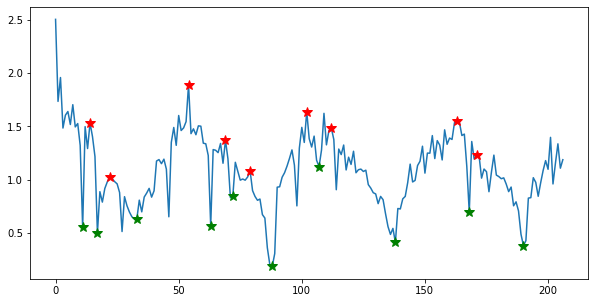

In [315]:
import pylab
from math import pi
temp=dataset["Global_active_power"]

print(dataset_np_norm.shape)
y = temp.to_numpy()
rms = np.sqrt(np.mean(y**2))
print(rms)
x = range(len(y))
print(len(x))
_max, _min = peakdetect(y,x,5,delta=rms/5)
xm = [p[0] for p in _max]
ym = [p[1] for p in _max]
xn = [p[0] for p in _min]
yn = [p[1] for p in _min]
plt.rcParams["figure.figsize"] = (10,5)
    
plot = pylab.plot(x,y)

pylab.plot(xm, ym, 'r*',markersize=10)
pylab.plot(xn, yn, 'g*',markersize=10)
print(len(ym),len(yn))

In [316]:
dataset = pd.read_csv(dataset_name, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
dataset_np = dataset.values
print(dataset_np.shape)
dataset.describe()

(207, 8)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,1.095154,0.123714,240.829745,4.642868,1.118873,1.295622,6.462413,9.375663
std,0.336740,0.025763,1.864082,1.380621,0.498359,0.540448,1.905975,3.662083
min,0.183998,0.067911,234.626560,0.865714,0.000000,0.039484,1.115179,1.652649
25%,0.875114,0.103555,240.223580,3.760704,0.831498,0.891891,5.137649,6.722746
50%,1.097675,0.121722,240.981200,4.644166,1.142659,1.237698,6.824305,9.106683
75%,1.328953,0.140389,241.770700,5.559950,1.423922,1.637450,7.589831,11.546531
max,2.505248,0.216384,246.609480,10.664162,2.562698,3.093453,12.147123,28.119608


In [317]:
dataset_np_norm = np.copy(dataset_np)
for c in range(8):
    dataset_np_norm[:, c] -= dataset_np[:, c].min()
    dataset_np_norm[:, c] /= (dataset_np[:, c].max()-dataset_np[:, c].min())
print(dataset_np_norm.shape)

(207, 8)


In [318]:
window_size = 5
n_window = dataset_np_norm.shape[0]-window_size+1
X, Y_gap = [], []
for w in range(n_window-1):
    X.append(dataset_np_norm[w:w+window_size])
    Y_gap.append(dataset_np[w+window_size][0])
    
Y_peak=np.zeros(len(X))
#for i in xm:
#    Y_peak[i-window_size+1:i+window_size]=1
for j in xn:
    Y_peak[j-window_size+1:j+window_size]=1
X, Y_peak, Y_gap = np.asarray(X), np.asarray(Y_peak), np.asarray(Y_gap)
print(X.shape, Y_peak.shape, Y_gap.shape)

(202, 5, 8) (202,) (202,)


In [319]:
Y_peak.tolist().count(0)

115

In [320]:
Y_peak.tolist().count(1)

87

In [321]:
from sklearn.model_selection import train_test_split

In [322]:
x_train, x_test,   y_train_peak, y_test_peak,   y_train_gap, y_test_gap = train_test_split(X, Y_peak, Y_gap, test_size=0.2, shuffle=True, stratify=Y_peak, random_state=34)

In [323]:
# Define our own plot function
def scatter(x, labels, subtitle=None):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[labels.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
        
    if subtitle != None:
        plt.suptitle(subtitle)
        
    plt.savefig(subtitle)

In [324]:
from keras.utils import to_categorical
y_train_peak_onehot = to_categorical(y_train_peak)
y_test_peak_onehot = to_categorical(y_test_peak)

In [325]:
y_train_peak_onehot.shape

(161, 2)

In [326]:
y_train_peak.shape

(161,)

In [327]:
from random import randrange
def generate_triplet(x,y,testsize=0.3,ap_pairs=10,an_pairs=10):
    data_xy = tuple([x,y])

    trainsize = 1-testsize

    triplet_train_pairs = []
    triplet_test_pairs = []
    for data_class in sorted(set(data_xy[1])):

        same_class_idx = np.where((data_xy[1] == data_class))[0]
        diff_class_idx = np.where(data_xy[1] != data_class)[0]
        ap_pair_num=0
        
        A_P_pairs=[]
        while(True):
            if ap_pair_num==ap_pairs:
                break
            else:
                pair_1=randrange(len(same_class_idx))
                pair_2=randrange(len(same_class_idx))
                ap_pair=(same_class_idx[pair_1],same_class_idx[pair_2])
                if pair_1!=pair_2 and ap_pair not in A_P_pairs:
                    ap_pair_num=ap_pair_num+1
                    A_P_pairs.append(ap_pair)
        print(len(diff_class_idx))
        Neg_idx = random.sample(list(diff_class_idx),k=an_pairs)
        

        #train
        A_P_len = len(A_P_pairs)
        Neg_len = len(Neg_idx)
        for ap in A_P_pairs[:int(A_P_len*trainsize)]:
            Anchor = data_xy[0][ap[0]]
            Positive = data_xy[0][ap[1]]
            for n in Neg_idx:
                Negative = data_xy[0][n]
                triplet_train_pairs.append([Anchor,Positive,Negative])               
        #test
        for ap in A_P_pairs[int(A_P_len*trainsize):]:
            Anchor = data_xy[0][ap[0]]
            Positive = data_xy[0][ap[1]]
            for n in Neg_idx:
                Negative = data_xy[0][n]
                triplet_test_pairs.append([Anchor,Positive,Negative])    
                
    return np.array(triplet_train_pairs), np.array(triplet_test_pairs)

In [328]:
X_train_tri, X_test_tri = generate_triplet(x_train,y_train_peak, ap_pairs=300, an_pairs=300,testsize=0.2)

69


ValueError: Sample larger than population or is negative

## Triplet NN

In [329]:
def triplet_loss(y_true, y_pred, alpha = 0.2):
    """
    Implementation of the triplet loss function
    Arguments:
    y_true -- true labels, required when you define a loss in Keras, you don't need it in this function.
    y_pred -- python list containing three objects:
            anchor -- the encodings for the anchor data
            positive -- the encodings for the positive data (similar to anchor)
            negative -- the encodings for the negative data (different from anchor)
    Returns:
    loss -- real number, value of the loss
    """
    print('y_pred.shape = ',y_pred)
    
    total_lenght = y_pred.shape.as_list()[-1]
#     print('total_lenght=',  total_lenght)
#     total_lenght =12
    
    anchor = y_pred[:,0:int(total_lenght*1/3)]
    positive = y_pred[:,int(total_lenght*1/3):int(total_lenght*2/3)]
    negative = y_pred[:,int(total_lenght*2/3):int(total_lenght*3/3)]

    # distance between the anchor and the positive
    pos_dist = K.mean(K.square(anchor-positive),axis=1)

    # distance between the anchor and the negative
    neg_dist = K.mean(K.square(anchor-negative),axis=1)

    # compute loss
    basic_loss = pos_dist-neg_dist+alpha
    loss = K.maximum(basic_loss,0.0)
 
    return loss

In [330]:
print(X_train_tri.shape)
print(X_test_tri.shape)

(144000, 3, 5, 8)
(36000, 3, 5, 8)


In [331]:
def create_base_network(in_dims):
    """
    Base network to be shared.
    """
    input_cnn_lstm = Input(shape=(X_train_tri.shape[2:]), name='input_layer')
    H = Reshape((X_train_tri.shape[2], X_train_tri.shape[3], 1))(input_cnn_lstm)
    H = TimeDistributed(Conv1D(filters=32, kernel_size=(2), padding='same', activation='tanh'))(H)
    H = TimeDistributed(MaxPooling1D(2))(H)
    H = TimeDistributed(Conv1D(filters=32, kernel_size=(2), padding='same', activation='tanh'), name='last_conv_layer')(H)
    H = TimeDistributed(MaxPooling1D(2))(H)

    H = TimeDistributed(Flatten())(H)
    H = LSTM(64, return_sequences=True)(H)
    H = LSTM(64, return_sequences=False)(H)

    H = Dense(64, activation='tanh', name='without_attention_layer')(H)
    H = Dense(64, activation='tanh')(H)
    output_cnn_lstm = Dense(32, activation='linear', name='output_layer')(H)
    # model.add(Dense(600))
    model_cnn_lstm_at = Model(input_cnn_lstm, output_cnn_lstm)

    # model.add(Dense(600))
    model_cnn_lstm_at = Model(input_cnn_lstm, output_cnn_lstm)
    return model_cnn_lstm_at

In [332]:
anchor_input = Input(X_train_tri.shape[2:], name='anchor_input')
positive_input = Input(X_train_tri.shape[2:], name='positive_input')
negative_input = Input(X_train_tri.shape[2:], name='negative_input')

# Shared embedding layer for positive and negative items
Shared_DNN = create_base_network(X_train_tri[2:])


encoded_anchor = Shared_DNN(anchor_input)
encoded_positive = Shared_DNN(positive_input)
encoded_negative = Shared_DNN(negative_input)


merged_vector = concatenate([encoded_anchor, encoded_positive, encoded_negative], axis=-1, name='merged_layer')

model = Model(inputs=[anchor_input,positive_input, negative_input], outputs=merged_vector)
model.compile(loss=triplet_loss, optimizer='adam')

y_pred.shape =  Tensor("merged_layer_8/concat:0", shape=(None, 96), dtype=float32)


In [333]:
model.summary()

Model: "model_48"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
anchor_input (InputLayer)       (None, 5, 8)         0                                            
__________________________________________________________________________________________________
positive_input (InputLayer)     (None, 5, 8)         0                                            
__________________________________________________________________________________________________
negative_input (InputLayer)     (None, 5, 8)         0                                            
__________________________________________________________________________________________________
model_47 (Model)                (None, 32)           78624       anchor_input[0][0]               
                                                                 positive_input[0][0]      

In [334]:
import tensorflow as tf
Anchor = X_train_tri[:,0,:].reshape(-1,5,8)
Positive = X_train_tri[:,1,:].reshape(-1,5,8)
Negative = X_train_tri[:,2,:].reshape(-1,5,8)
Anchor_test = X_test_tri[:,0,:].reshape(-1,5,8)
Positive_test = X_test_tri[:,1,:].reshape(-1,5,8)
Negative_test = X_test_tri[:,2,:].reshape(-1,5,8)

Y_dummy = np.empty((Anchor.shape[0],600))
Y_dummy2 = np.empty((Anchor_test.shape[0],600))
es = EarlyStopping(monitor='val_loss', restore_best_weights=True, patience=5)

model.fit([Anchor,Positive,Negative],y=Y_dummy,validation_data=([Anchor_test,Positive_test,Negative_test],Y_dummy2),callbacks=[es], batch_size=2048, epochs=100)

Train on 144000 samples, validate on 36000 samples
Epoch 1/100
144000/144000 [==============================] - 6s 45us/step - loss: 0.1947 - val_loss: 0.1992
Epoch 2/100
144000/144000 [==============================] - 4s 30us/step - loss: 0.1755 - val_loss: 0.2210
Epoch 3/100
144000/144000 [==============================] - 4s 30us/step - loss: 0.1555 - val_loss: 0.2269
Epoch 4/100
144000/144000 [==============================] - 4s 30us/step - loss: 0.1364 - val_loss: 0.2412
Epoch 5/100
144000/144000 [==============================] - 4s 30us/step - loss: 0.1206 - val_loss: 0.2590
Epoch 6/100
144000/144000 [==============================] - 4s 29us/step - loss: 0.1090 - val_loss: 0.2677


In [335]:
trained_model = Model(inputs=anchor_input, outputs=encoded_anchor)

In [336]:
trained_model.save('./trained.h5')

In [337]:
tsne = TSNE()
X_train_trm = trained_model.predict(x_train[:512])
X_test_trm = trained_model.predict(x_test[:512])
train_tsne_embeds = tsne.fit_transform(X_train_trm)
eval_tsne_embeds = tsne.fit_transform(X_test_trm)

C:\Users\sclab\anaconda3\envs\electric\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\sclab\anaconda3\envs\electric\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and p

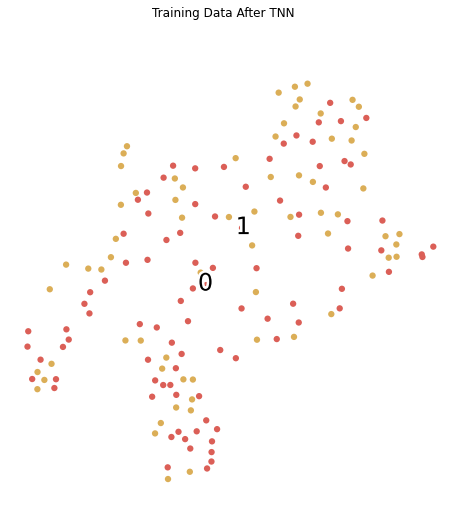

In [338]:
scatter(train_tsne_embeds, y_train_peak[:512], "Training Data After TNN")

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

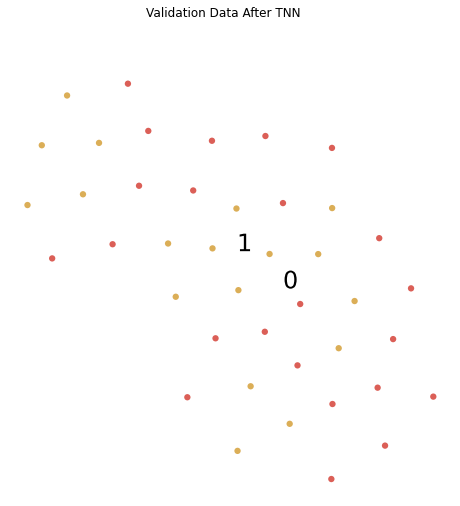

In [339]:
scatter(eval_tsne_embeds, y_test_peak[:512], "Validation Data After TNN")

In [340]:
# Prediction 

In [341]:
# Build Transferred CNN-LSTM
p_input = trained_model.output
H = Dense(16, activation='tanh')(p_input)
H = Dense(16, activation='tanh')(H)
p_output = Dense(1, activation='linear')(H)
prediction_model = Model(trained_model.input, p_output)
prediction_model.summary()
prediction_model.compile(loss='mse', optimizer='adam', metrics=['mse', 'kullback_leibler_divergence','MAPE','MAE'])
es = EarlyStopping(monitor='val_loss', restore_best_weights=True, patience=10)
prediction_model.fit(x_train, y_train_gap, validation_data=(x_test, y_test_gap), epochs=200, batch_size=2048, shuffle=False, callbacks=[es])

Model: "model_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
anchor_input (InputLayer)    (None, 5, 8)              0         
_________________________________________________________________
model_47 (Model)             (None, 32)                78624     
_________________________________________________________________
dense_59 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_60 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 17        
Total params: 79,441
Trainable params: 79,441
Non-trainable params: 0
_________________________________________________________________
Train on 161 samples, validate on 41 samples
Epoch 1/200
161/161 [==============================] - 1s 6ms/step - loss: 

Epoch 27/200
161/161 [==============================] - 0s 112us/step - loss: 0.1000 - mse: 0.1000 - kullback_leibler_divergence: -0.0693 - MAPE: 33.9356 - MAE: 0.2506 - val_loss: 0.0681 - val_mse: 0.0681 - val_kullback_leibler_divergence: -0.0666 - val_MAPE: 24.6805 - val_MAE: 0.2230
Epoch 28/200
161/161 [==============================] - 0s 105us/step - loss: 0.1010 - mse: 0.1010 - kullback_leibler_divergence: -0.0698 - MAPE: 34.4385 - MAE: 0.2509 - val_loss: 0.0691 - val_mse: 0.0691 - val_kullback_leibler_divergence: -0.0666 - val_MAPE: 24.9328 - val_MAE: 0.2236
Epoch 29/200
161/161 [==============================] - 0s 112us/step - loss: 0.1019 - mse: 0.1019 - kullback_leibler_divergence: -0.0700 - MAPE: 34.8055 - MAE: 0.2516 - val_loss: 0.0696 - val_mse: 0.0696 - val_kullback_leibler_divergence: -0.0666 - val_MAPE: 25.0400 - val_MAE: 0.2238
Epoch 30/200
161/161 [==============================] - 0s 118us/step - loss: 0.1023 - mse: 0.1023 - kullback_leibler_divergence: -0.0701 - MA

In [342]:
# Build Base CNN-LSTM
b_input = Input(shape=(x_train.shape[1:]))
H = Reshape((X_train_tri.shape[2], X_train_tri.shape[3], 1))(b_input)
H = TimeDistributed(Conv1D(filters=32, kernel_size=(2), padding='same', activation='tanh'))(H)
H = TimeDistributed(MaxPooling1D(2))(H)
H = TimeDistributed(Conv1D(filters=32, kernel_size=(2), padding='same', activation='tanh'), name='last_conv_layer')(H)
H = TimeDistributed(MaxPooling1D(2))(H)

H = TimeDistributed(Flatten())(H)
H = LSTM(64, return_sequences=True)(H)
H = LSTM(64, return_sequences=False)(H)

H = Dense(64, activation='tanh', name='without_attention_layer')(H)
H = Dense(64, activation='tanh')(H)
H = Dense(32, activation='tanh')(H)
H = Dense(16, activation='tanh')(H)
H = Dense(16, activation='tanh')(H)
b_output = Dense(1, activation='linear')(H)
model_cnn_lstm_base = Model(b_input, b_output)
model_cnn_lstm_base.compile(loss='mse', optimizer='adam', metrics=['mse', 'kullback_leibler_divergence','MAPE','MAE'])
es = EarlyStopping(monitor='val_loss', restore_best_weights=True, patience=10)
model_cnn_lstm_base.fit(x_train, y_train_gap, validation_data=(x_test, y_test_gap), epochs=200, batch_size=2048, shuffle=False, callbacks=[es])

Train on 161 samples, validate on 41 samples
Epoch 1/200
161/161 [==============================] - 1s 5ms/step - loss: 1.3420 - mse: 1.3420 - kullback_leibler_divergence: 14.4910 - MAPE: 103.1474 - MAE: 1.1109 - val_loss: 1.0536 - val_mse: 1.0536 - val_kullback_leibler_divergence: 2.4124 - val_MAPE: 93.1950 - val_MAE: 0.9935
Epoch 2/200
161/161 [==============================] - 0s 99us/step - loss: 1.1292 - mse: 1.1292 - kullback_leibler_divergence: 2.3620 - MAPE: 92.8505 - MAE: 1.0126 - val_loss: 0.8757 - val_mse: 0.8757 - val_kullback_leibler_divergence: 1.6159 - val_MAPE: 83.9391 - val_MAE: 0.9007
Epoch 3/200
161/161 [==============================] - 0s 99us/step - loss: 0.9458 - mse: 0.9458 - kullback_leibler_divergence: 1.5782 - MAPE: 83.0830 - MAE: 0.9194 - val_loss: 0.6981 - val_mse: 0.6981 - val_kullback_leibler_divergence: 1.1577 - val_MAPE: 73.6220 - val_MAE: 0.7972
Epoch 4/200
161/161 [==============================] - 0s 112us/step - loss: 0.7622 - mse: 0.7622 - kullback

In [ ]:
# Validation: Ground_truth vs. Peak_CNN_LSTM (train)
visible_length, n_vis = 50, 20
y_train_gap_hat = prediction_model.predict(x_train)
y_train_gap_hat_base = model_cnn_lstm_base.predict(x_train)
for n in range(n_vis):
    rand_idx = np.random.randint(0, y_train_gap.shape[0])
    plt.plot(y_train_gap[rand_idx:rand_idx+visible_length],'g-')
    plt.plot(y_train_gap[rand_idx:rand_idx+visible_length],'go',markersize=3)
    plt.plot(y_train_gap_hat[rand_idx:rand_idx+visible_length],'r--')
    plt.plot(y_train_gap_hat[rand_idx:rand_idx+visible_length],'ro',markersize=3)
    plt.plot(y_train_gap_hat_base[rand_idx:rand_idx+visible_length],'b--')
    plt.plot(y_train_gap_hat_base[rand_idx:rand_idx+visible_length],'bo',markersize=3)
    plt.show()

In [ ]:
# Validation: Ground_truth vs. Peak_CNN_LSTM (test)
visible_length, n_vis = 50, 20
y_test_gap_hat = prediction_model.predict(x_test)
y_test_gap_hat_base = model_cnn_lstm_base.predict(x_test)
for n in range(n_vis):
    rand_idx = np.random.randint(0, y_test_gap.shape[0])
    plt.plot(y_test_gap[rand_idx:rand_idx+visible_length],'g-')
    plt.plot(y_test_gap[rand_idx:rand_idx+visible_length],'go',markersize=3)
    plt.plot(y_test_gap_hat[rand_idx:rand_idx+visible_length],'r--')
    plt.plot(y_test_gap_hat[rand_idx:rand_idx+visible_length],'ro',markersize=3)
    plt.plot(y_test_gap_hat_base[rand_idx:rand_idx+visible_length],'b--')
    plt.plot(y_test_gap_hat_base[rand_idx:rand_idx+visible_length],'bo',markersize=3)
    plt.legend(['Ground truth', 'Base', 'Peak CNN-LSTM'])
    plt.show()

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
cv_idx = KFold(n_splits=10, shuffle=False)
for (train_idx, test_idx) in cv_idx.split(Y_gap):
    Y_train, X_train = Y_gap[train_idx], X[train_idx]
    Y_test, X_test= Y_gap[test_idx], X[test_idx]
    p_input = trained_model.output
    H = Dense(16, activation='tanh')(p_input)
    H = Dense(16, activation='tanh')(H)
    p_output = Dense(1, activation='linear')(H)
    prediction_model = Model(trained_model.input, p_output)
    prediction_model.summary()
    prediction_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mse', 'kullback_leibler_divergence'])
    es = EarlyStopping(monitor='val_loss', restore_best_weights=True, patience=10)
    prediction_model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200, batch_size=2048, shuffle=True, callbacks=[es])
    plt.plot(prediction_model.history.history['mse'])
    plt.plot(prediction_model.history.history['val_mse'])
    plt.title('MSE')
    plt.legend(['Train', 'Test'])
    plt.show()